In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from importlib import reload

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from pytochondrion.simulators import mitochondrial_simulator
from pytochondrion.utilities import calculate_values

In [3]:
# initial values (*from BK*)
nadh_0 = 822
uqh_0 = 1143
c2plus_0 = 60.89
o2_0 = 240 # (*from BK (1991)*)
h_i_0 = 0.037
atp_ti_0 = 6987
pi_ti_0 = 7020
atp_te_0 = 6668
adp_te_0 = 31.7
pi_te_0 = 2599
pcr_0 = 12219

Y_0 = [nadh_0, uqh_0, c2plus_0, o2_0, h_i_0, atp_ti_0, pi_ti_0, atp_te_0, adp_te_0, pi_te_0, pcr_0]
Y_0

[822, 1143, 60.89, 240, 0.037, 6987, 7020, 6668, 31.7, 2599, 12219]

In [5]:
ODE_solution = solve_ivp(mitochondrial_simulator, [0, 5], Y_0, method='BDF')

Plot the solution


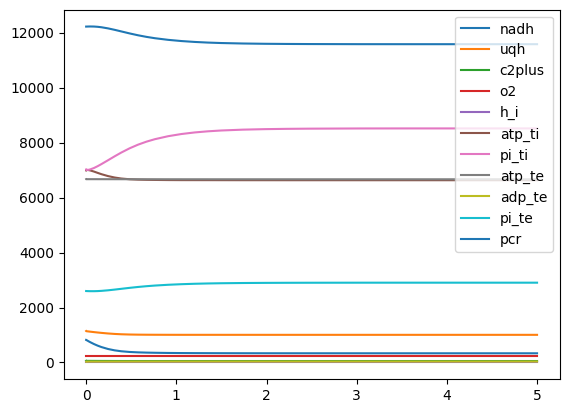

In [7]:
fig, ax = plt.subplots()
Y, t = ODE_solution['y'], ODE_solution['t']
labels = ["nadh", "uqh", "c2plus", "o2", "h_i", "atp_ti", "pi_ti", "atp_te", "adp_te", "pi_te", "pcr"]
# ax.plot(t, Y.T);
for y, label in zip(Y, labels):
    ax.plot(t, y, label=label)
ax.legend();

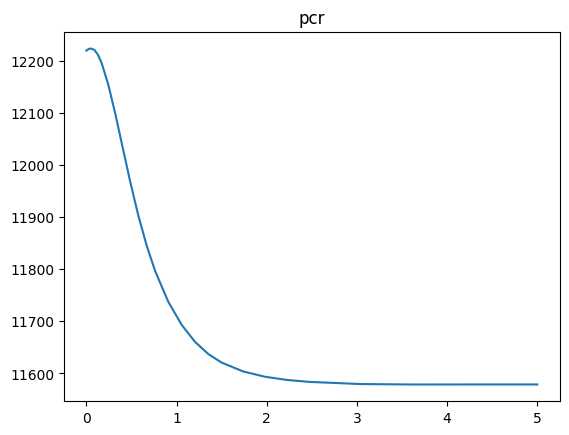

In [8]:
fig, ax = plt.subplots()
plt.plot(t, Y[10])
plt.title(labels[10]);

Now calculate other metabolites values from the ODE solution and plot a few

In [9]:
calculated_values = calculate_values(Y)
print("Available metabolites: ", calculated_values.keys())

Available metabolites:  dict_keys(['adp_ti', 'atp_fe', 'nad', 'uq', 'pH_i', 'deltapH', 'deltap', 'delta_psi', 'amp_e', 'cr', 'atp_tot', 'pi_tot', 'adp_tot'])


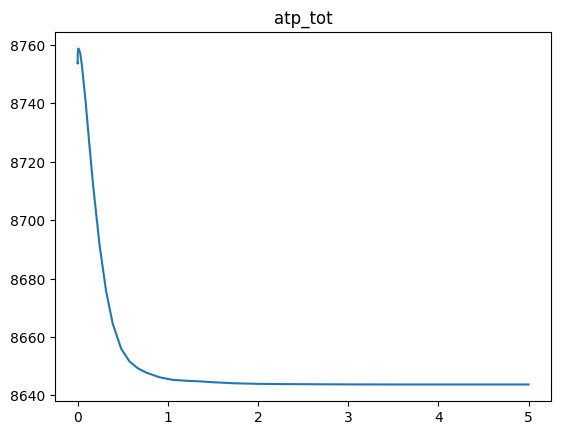

In [10]:
metabolite = 'atp_tot'
fig, ax = plt.subplots()
plt.plot(t, calculated_values[metabolite])
plt.title(metabolite);